# Hw 3: Sentiment Analysis on Twitter Data 🐦

Name: Joseph Merkadeau

Student ID: 473513

Collaborators:

## Preparation

Packages to be installed: 

In [1]:
! pip install wordcloud
! pip install python-twitter
! pip install requests
! pip install requests-oauthlib
! pip install nba_api

### Public and Secret Keys

This Twitter API, along with many others, utilize public and secret keys to make sure that only validated individuals can access the API commands and functions. Plugging these into the program can validate the user and allow the API to know who is using which commands. For the most part, these APIs or companies make it pretty simply to receive their own API keys to be used for a number of processes. 

### Creating and Accessing API Keys

To create your own API Keys for Twitter Data, the steps are quite simple! While this does require a Twitter account, there is no extra information or payment necessary to access this data.

First, go to https://developer.twitter.com and sign in to your account. If you do not have a Twitter account (or don't want to link your personal account), you can use a separate email for this.

Next, click on Apps and fill out the forms to the best of your ability (not all information is necessary). This will require a phone number, which Twitter uses as a safety check (they don't hand out API keys to just everyone!)

Once approved, click on Keys and Tokens, and you should find your API Keys and access tokens!

## Problem 1:  Analyzing Twitter Data

We start with importing the package into the notebook or the python program.

In [1]:
import twitter

We then will then import a few other packages that will be needed throughout the homework

In [2]:
import sys
import re, string

In [3]:
import numpy as np
import pandas as pd

In [27]:
import requests

Our next step is to plug in your API keys, which can be found from the Twitter developer website. This will give us limited access for searching tweets, mostly limiting us to the past week and occasionally restricting the amount of tweets we can pull at a time.

In [4]:
api = twitter.Api(consumer_key='55c5gulfh9njzM2aMDHIf9pdq',
                  consumer_secret='CXbbOKuyzzN2kqkuX6ENzKS2uBdfXHLeSCm9dFDQVu0kT98KGU',
                  access_token_key='1147203307330404357-Qhz07JHtP9sxjFdi5ow8PwW5Fx2eiV',
                  access_token_secret='8HQr9YmQN7RpnIxMYTpPVTBJcrZNpbtiwHW3HDHqXeUsG',
                  sleep_on_rate_limit=True)

In [5]:
# FUNCTIONS
from nba_api.stats.static import teams

def getAllNBATeams():
    nba_teams = teams.get_teams()
    return (nba_teams)
nba_teams = getAllNBATeams();

In [6]:
# FUNCTIONS
from nba_api.stats.endpoints import leaguegamefinder

def getTeamGames(fullTeamName = "Golden State Warriors", season="2021-22", seasonType="Regular Season"):
    
    teamInfo = [team for team in nba_teams if team['full_name'] == fullTeamName][0]

    gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=teamInfo['id'], season_nullable=season, 
                                                   season_type_nullable=seasonType)
    games = gamefinder.get_data_frames()[0]
    return(games)

In [7]:
# FUNCTIONS
from nba_api.stats.endpoints import boxscoretraditionalv2

def getGameRoster(gameId):
    boxScore = boxscoretraditionalv2.BoxScoreTraditionalV2(game_id=gameId, end_period=1, 
                                              end_range=0, range_type=0, 
                                              start_period=1, start_range=0) 
    box = boxScore.get_data_frames()[0]

    minutes = []
    for time in box['MIN']:
        if time is not None:  
            (m, s) = time.split(':')
            minutes.append(int(m))
        else:
            minutes.append(0)
    box['MIN'] = minutes        
    playingTime = box[box['MIN'] > 5]

    return(playingTime)

In [8]:
# MAIN
# default: getTeamGames(fullTeamName = "Golden State Warriors", season="2021-22", seasonType="Regular Season")
games = getTeamGames(fullTeamName="Golden State Warriors", season="2021-22", seasonType="Regular Season")
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22021,1610612744,GSW,Golden State Warriors,0022100376,2021-12-08,GSW vs. POR,W,241,104,...,0.774,10,37,47,22,9,3,15,19,10.0
1,22021,1610612744,GSW,Golden State Warriors,0022100361,2021-12-06,GSW vs. ORL,W,242,126,...,0.690,7,36,43,28,15,2,15,19,31.0
2,22021,1610612744,GSW,Golden State Warriors,0022100346,2021-12-04,GSW vs. SAS,L,240,107,...,0.667,11,34,45,26,6,2,12,18,-5.0
3,22021,1610612744,GSW,Golden State Warriors,0022100340,2021-12-03,GSW vs. PHX,W,239,118,...,0.750,11,40,51,30,10,8,17,29,22.0
4,22021,1610612744,GSW,Golden State Warriors,0022100316,2021-11-30,GSW @ PHX,L,240,96,...,0.714,15,36,51,25,7,5,22,13,-8.0


In [10]:
roster = getGameRoster("0022100361")

In [11]:
# default: none
import time

# for gameId in games["GAME_ID"]:  
#     time.sleep(1)
#     roster = getGameRoster(gameId)
#     for i in roster
#     thisdict = {
#       "brand": "Ford",
#       "model": "Mustang",
#       "year": 1964
#     }
    
# roster = getGameRoster("0022100361")
returnVal = []
for (i, row) in roster.iterrows():
#     print(row['PLAYER_NAME'])
#     print(row['MIN'])
    playerDict = {
        'PLAYER_NAME': row['PLAYER_NAME'],
        'MIN': row['MIN']
    }
    returnVal.append(playerDict)
returnVal = np.array(returnVal)
print(returnVal)

[{'PLAYER_NAME': 'Franz Wagner', 'MIN': 30}
 {'PLAYER_NAME': 'Wendell Carter Jr.', 'MIN': 29}
 {'PLAYER_NAME': 'Mo Bamba', 'MIN': 17}
 {'PLAYER_NAME': 'Gary Harris', 'MIN': 27}
 {'PLAYER_NAME': 'Cole Anthony', 'MIN': 27}
 {'PLAYER_NAME': 'Terrence Ross', 'MIN': 21}
 {'PLAYER_NAME': 'Chuma Okeke', 'MIN': 25}
 {'PLAYER_NAME': 'R.J. Hampton', 'MIN': 23}
 {'PLAYER_NAME': 'Mychal Mulder', 'MIN': 14}
 {'PLAYER_NAME': 'Moritz Wagner', 'MIN': 17}
 {'PLAYER_NAME': 'Andrew Wiggins', 'MIN': 29}
 {'PLAYER_NAME': 'Draymond Green', 'MIN': 28}
 {'PLAYER_NAME': 'Kevon Looney', 'MIN': 12}
 {'PLAYER_NAME': 'Jordan Poole', 'MIN': 32}
 {'PLAYER_NAME': 'Stephen Curry', 'MIN': 30}
 {'PLAYER_NAME': 'Gary Payton II', 'MIN': 17}
 {'PLAYER_NAME': 'Otto Porter Jr.', 'MIN': 19}
 {'PLAYER_NAME': 'Juan Toscano-Anderson', 'MIN': 12}
 {'PLAYER_NAME': 'Nemanja Bjelica', 'MIN': 11}
 {'PLAYER_NAME': 'Damion Lee', 'MIN': 23}
 {'PLAYER_NAME': 'Jonathan Kuminga', 'MIN': 12}]


In [13]:
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22021,1610612744,GSW,Golden State Warriors,0022100376,2021-12-08,GSW vs. POR,W,241,104,...,0.774,10,37,47,22,9,3,15,19,10.0
1,22021,1610612744,GSW,Golden State Warriors,0022100361,2021-12-06,GSW vs. ORL,W,242,126,...,0.690,7,36,43,28,15,2,15,19,31.0
2,22021,1610612744,GSW,Golden State Warriors,0022100346,2021-12-04,GSW vs. SAS,L,240,107,...,0.667,11,34,45,26,6,2,12,18,-5.0
3,22021,1610612744,GSW,Golden State Warriors,0022100340,2021-12-03,GSW vs. PHX,W,239,118,...,0.750,11,40,51,30,10,8,17,29,22.0
4,22021,1610612744,GSW,Golden State Warriors,0022100316,2021-11-30,GSW @ PHX,L,240,96,...,0.714,15,36,51,25,7,5,22,13,-8.0


In [14]:
roster

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,0022100361,1610612753,ORL,Orlando,1630532,Franz Wagner,Franz,F,,30,...,3.0,1.0,4.0,6.0,3.0,0.0,1.0,0.0,15.0,-17.0
1,0022100361,1610612753,ORL,Orlando,1628976,Wendell Carter Jr.,Wendell,F,,29,...,1.0,11.0,12.0,3.0,1.0,0.0,1.0,2.0,14.0,-24.0
2,0022100361,1610612753,ORL,Orlando,1628964,Mo Bamba,Mo,C,,17,...,0.0,3.0,3.0,2.0,0.0,2.0,3.0,1.0,2.0,-5.0
3,0022100361,1610612753,ORL,Orlando,203914,Gary Harris,Gary,G,,27,...,0.0,3.0,3.0,1.0,1.0,0.0,2.0,3.0,17.0,-14.0
4,0022100361,1610612753,ORL,Orlando,1630175,Cole Anthony,Cole,G,,27,...,0.0,1.0,1.0,1.0,0.0,0.0,4.0,2.0,9.0,-18.0
5,0022100361,1610612753,ORL,Orlando,203082,Terrence Ross,Terrence,,,21,...,1.0,4.0,5.0,0.0,0.0,0.0,3.0,0.0,8.0,-5.0
6,0022100361,1610612753,ORL,Orlando,1629643,Chuma Okeke,Chuma,,,25,...,0.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,10.0,-17.0
7,0022100361,1610612753,ORL,Orlando,1630181,R.J. Hampton,R.J.,,,23,...,0.0,2.0,2.0,0.0,1.0,0.0,6.0,3.0,16.0,-17.0
8,0022100361,1610612753,ORL,Orlando,1628539,Mychal Mulder,Mychal,,,14,...,0.0,3.0,3.0,0.0,1.0,0.0,1.0,1.0,3.0,-12.0
9,0022100361,1610612753,ORL,Orlando,1629021,Moritz Wagner,Moritz,,,17,...,0.0,3.0,3.0,3.0,1.0,0.0,1.0,5.0,1.0,-16.0


In [ ]:
curl "https://api.havenondemand.com/1/api/async/recognizelicenseplates/v1
?url=https%3A%2F%2Fwww.havenondemand.com%2Fsample-content%2Fvideos%2Fgb-plates.mp4
&source_location=GB
&apikey=695e513c-xxxx-xxxx-xxxx-xxxxxxxxxx"

curl -X POST --form "url=https://www.havenondemand.com/sample-content/videos/gb-plates.mp4" --form "source_location=GB" --form "apikey=695e513c-xxxx-xxxx-a666-xxxxxxxxxx" https://api.havenondemand.com/1/api/async/recognizelicenseplates/v1

#

API_URL = "https://api.havenondemand.com/1/api/async/recognizelicenseplates/v1"

data = {
    "url": "https://www.havenondemand.com/sample-content/videos/gb-plates.mp4",
    "source_location": "GB",
    "apikey": "695e513c-xxxx-xxxx-a666-xxxxxxxxxx"
 }

response = requests.post(API_URL, data)
print(response.json())

In [32]:
from requests.structures import CaseInsensitiveDict

# curl "https://api.twitter.com/2/tweets/search/all
#         ?query=entity%3A%22Steph%20Curry%22
#         &start_time=2021-12-06T00:00:00.000Z
#         &end_time=2021-12-06T23:59:00.000Z
#         &max_results=10
#         &tweet.fields=public_metrics" 
# -H "Authorization: Bearer $BEARER_TOKEN"

API_URL = "https://api.twitter.com/2/tweets/search/all"

headers = CaseInsensitiveDict()
# headers["Authorization"] = "Bearer $1147203307330404357-Qhz07JHtP9sxjFdi5ow8PwW5Fx2eiV"
bearer_token = "1147203307330404357-Qhz07JHtP9sxjFdi5ow8PwW5Fx2eiV"

r.headers["Authorization"] = f"Bearer {bearer_token}"

data = {
    "query": 'entity: "Steph Curry"',
    "start_time": "2021-12-06T00:00:00.000Z",
    "end_time": "2021-12-06T23:59:00.000Z",
    "max_results": "10",
    "tweet.fields": "public_metrics"
}

entity:"Steph Curry"

response = requests.post(API_URL, headers=headers, data=data)
print(response.status_code)


405


In [20]:
# This function will take in a search term and run through the twitter API to find
# the most recent tweets using that search term!

def searchTerm(searchTerm, startDate, endDate):
    
    # These two variables are used to keep track of calls made to the API
    untilID = sys.maxsize
    ids = []
    processedResults = []
    
    # Create a while loop that runs as long as the length of processedResults is under 100
    
    # your code here 
    counter = 0

    while (len(processedResults) < 5):
        
        # Call the getResults function, passing in the searchTerm as well as untilID
        
        # your code here 
        results = getResults(searchTerm, untilID, startDate, endDate)


        # Create a loop going through each result in results. 
        #
        # Run preProcess on each result: if the returned value is not None, append the result and result.id
        # to their respective lists
        
        # your code here
        for i in results:
            processedResults.append(i)
#             result = preProcess(i)
#             if (result != None):
#                 counter += 1
#                 ids.append(i.id)
#                 processedResults.append(result)                
            
        untilID = min(ids)
    
         
    return processedResults
#     return results

In [34]:
# TESTING
searchTerm, startDate, endDate = "Jordan Poole", "2021-11-06", "2021-11-07"
untilID = sys.maxsize

# testData = searchTerm("Steph Curry", "2021-12-06", "2021-12-07")
testData = api.GetSearch(term=searchTerm, since=startDate, until=endDate, count="5",\
                            result_type='recent', max_id=untilID, lang='en')
testData

[]

In [24]:
testData[0]

Status(ID=1468006342610804739, ScreenName=_IamTrueHate, Created=Mon Dec 06 23:56:00 +0000 2021, Text="I like Cole bit this is disrespectful to steph. Maybe Jordan Poole vs Cole but Steph? Steph shouldn't get that unle… https://t.co/INAnyzWRe6")

In [16]:
# This function will take the search term and return a list of tweet words

def getResults(searchTerm, untilID, startDate, endDate):
    
    # We will use api.GetSearch() in order to pull the Twitter data
    #
    # There are several parameters that we will need to include:
    #
    #     term: string, the term that is being searched
    #     since: string in format 'YYYY-MM-DD' which will serve as the earliest date
    #     until: string in format 'YYYY-MM-DD' which will serve as the latest data 
    #     count: int, the number of tweets to return, max of 100
    #     result_type: string, type of sorting for tweets. Typically 'recent'
    #     max_id: int, another check to limit the tweets returned. Typically sys.maxint
    #     lang: string, indication of the language being used
    #
    # You are free to change these however you wish, yet we recommend leaving lang as 'en'
    
    # CAUTION: The 'since' variable must be at most a week prior to the current date!
    #          If you would like to search further, you must apply through Twitter
    
    results = api.GetSearch(term=searchTerm, since=startDate, until=endDate, count="5",\
                            result_type='recent', max_id=untilID, lang='en')
        
    return results

In [29]:
# Here we pass in a result, which is a Twitter object from python-twitter, and return the processed result!

def preProcess(result):
    
    # First make sure that the result is not a retweet (result.retweeted_status) 
    # nor a media post (result.media)
    
    # your code here 
    if (result.retweeted_status == None and result.media == None):
    

        
        # Remove links (anything before "https://") and remove whitespace
        
        # your code here 
        
        separate_text = result.text.split('https://', 1)
        text = separate_text[0]
#         print(text)
        
        
        # Deal with punctuation within the tweets, removing most (if not all) punctuation
        # and set processedResult to all lowercase as well as split into a list of words        
        
        # your code here 
        
        text = text.strip()
        processedResult = text.lower().replace('\n', " ").replace('\t', " ").translate(str.maketrans("","", string.punctuation)).split(" ")
        
    else:
        return None
        
    return processedResult


In [16]:
# Replace the string within the searchTerm function to search for new Twitter sentiment data!

data = searchTerm('steph curry')
data

steph curry


[['ima', 'tell', 'my', 'kids', 'this', 'was', 'steph', 'curry'],
 ['steph', 'curry', 'from', 'the', 'standssick', 'stephencurry30'],
 ['skillarecords',
  'hanahoops',
  'nahh',
  'love',
  'giannis',
  'but',
  'steph',
  'curry',
  'is',
  'the',
  'best',
  'nba',
  'player',
  'this',
  'season',
  'rn'],
 ['i',
  'know',
  'that',
  'its',
  'early',
  'in',
  'the',
  'season',
  'however',
  'so',
  'far',
  'steph',
  'curry',
  'is',
  'having',
  'another',
  'mvp',
  'caliber',
  'season',
  'mvp',
  'mvp',
  'mv…'],
 ['cool',
  'common',
  'sense',
  'says',
  '“yeah',
  'steph',
  'curry’s',
  'shots',
  'are',
  'from',
  'further',
  'than',
  'rudy',
  'gobert’s”',
  '',
  '',
  'that',
  'stat',
  'is',
  'just',
  'to',
  'tell…'],
 ['there’s',
  'no',
  'way',
  'steph',
  'curry',
  'isn’t',
  'the',
  'greatest',
  'shooter',
  'of',
  'all',
  'time'],
 ['this', '', 'is', 'why', 'we', 'love', '❤️', 'steph', 'curry'],
 ['xomzmieann',
  'he',
  'meant',
  'steph',
  

**NOTE:** If the Twitter API fails to work, or for some reason users are unable to access the data, one can use data from the zipped sampleTwitterData folder to continue to work on the lab. It is important to note that there are 10 CSV files containting the tweets for 10 keywords and each CSV has over 500 tweets, yet these tweets are **not** processed! You will still need to implement and run an appropriate version of preProcess() on that data. 

Great! We now have all the data stored in our data variable. We can cycle through this data set and perform the same rule-based sentiment analysis that we saw previously in the lab.

In [177]:
# This function runs a rule-based sentiment analysis on a given entry

def analyzeSentiment(entry):
    
    # Set the score to zero, then loop through each word in the entry
    # At each word, add one to the score if it is in positive_words, subtract one if it is in negative_words
    # or do nothing if it is in neither!
    
    # your code here 
    score = 0
    for word in entry:
        if word in positive_words:
            score += 1
        if word in negative_words:
            score -= 1
            
    return score

In [178]:
# Don't touch this code! For setup purposes only

sentiments = []

global negative_words
global positive_words

with open('utility/data/negative-words.txt') as f:
    negative_words = [word.strip() for word in f.readlines() if word[0] not in [';', '\n']]

with open('utility/data/positive-words.txt') as f:
    positive_words = [word.strip() for word in f.readlines() if word[0] not in [';', '\n']]
    
for entry in data:
    
    sentiments.append(analyzeSentiment(entry))

In [179]:
print(sentiments)

[-3, 1, 0, 0, 0, 0, 0, -1, 1, 1, 2, 0, 0, -1, -3, 0, -1, 2, 0, 1, 2, -1, 0, -1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, -1, 0, 1, 1, 0, 1, 0, 1, -2, 0, 0, 0, 3, -1, 0, 0, 1, 0, 0, 0, 0, -1, 2, 1, 0, -1, 1, 0, 0, 0, 0, -2, 1, 0, 1, -2, 1, 0, 2, 0, 0, 0, -1, -1, 2, -2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]


## Problem 2: Understanding the Results
### Visualizing the Results

The final step is creating a few simple charts to look at the overall sentiment of the current Twitter search.

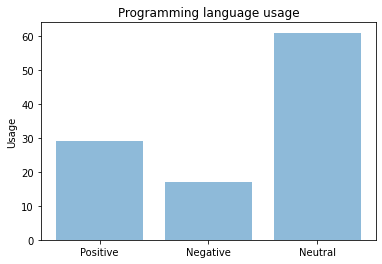

In [180]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
objects = ('Positive', 'Negative', 'Neutral')
y_pos = np.arange(len(objects))
# positive = sum([1 for x in sentiments if x == 'Positive'])
# negative = sum([1 for x in sentiments if x == 'Negative'])
positive = sum([1 for x in sentiments if x > 0])
negative = sum([1 for x in sentiments if x < 0])
neutral = sum([1 for x in sentiments if x == 0])
performance = [positive, negative, neutral]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

### Further Visualization

For a slightly more colorful view at the overall data, we can use a wordcloud module!

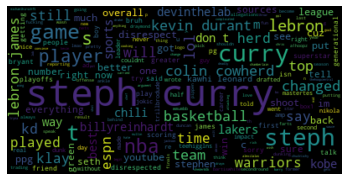

In [181]:
from wordcloud import WordCloud
import os

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

overallWords = ' '

for entry in data:
    for word in entry:
        overallWords += word + ' '

wordcloud = WordCloud().generate(overallWords)

# lower max_font_size
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

After looking at the two graphs, there are many things that can be seen after analyzing Twitter data. Fill in the markdown box below with some of your findings. A few questions have been provided as examples.

- What was the overall sentiment? 
- What were some of the words that were used the most (larger = more common)? 
- Why do you think this is? 
- Do you believe this would be different during different weeks?

**Answer:**